### **Sentimen Analisis Pengguna Aplikasi "Grok" di Play Store**

Analisis sentimen pengguna aplikasi Grok di Play Store perlu dilakukan untuk memahami berbagai faktor yang memengaruhi persepsi mereka. Salah satu aspek yang berpengaruh adalah keterkaitan aplikasi ini dengan Elon Musk sebagai CEO X, terutama karena pandangan politiknya yang kontroversial di Amerika Serikat. Musk dikenal memiliki kecenderungan politik ke kanan dan kerap mendukung gerakan serta partai politik ekstrem di berbagai negara seperti Amerika Serikat (US), Jerman, dan Spanyol. Pandangan politiknya sering memicu perdebatan luas dan berdampak pada reputasi perusahaan-perusahaan yang ia miliki, termasuk Tesla dan X. Akibatnya, beberapa pengguna mungkin memiliki sentimen negatif terhadap Grok karena asosiasinya dengan Musk, yang sering menjadi sorotan kontroversi terkait isu-isu seperti imigrasi, regulasi bisnis, dan kebijakan sosial.  

Selain itu, keterlibatan Musk dalam menyebarkan informasi yang kerap dianggap sebagai misinformasi melalui platform X juga dapat memengaruhi bagaimana pengguna memandang Grok sebagai produk AI yang dikembangkannya. Grok bahkan pernah disebut sebagai salah satu alat yang mengidentifikasi Musk sebagai penyebar misinformasi di platformnya sendiri, menimbulkan pertanyaan tentang kredibilitas aplikasi tersebut. Dalam konteks ini, analisis sentimen dapat membantu menentukan sejauh mana persepsi terhadap Elon Musk secara pribadi memengaruhi penerimaan pengguna terhadap Grok di Play Store.  

Di sisi lain, analisis sentimen terhadap aplikasi Grok yang terpisah dari platform X juga perlu mempertimbangkan dinamika penerimaan pengguna terhadap integrasi AI ini yang telah dilakukan di aplikasi X. Awalnya, integrasi Grok ke X menuai skeptisisme karena dianggap kurang sesuai dengan fungsi utama platform sebagai media sosial. Banyak pengguna merasa fitur AI ini mengganggu pengalaman berjejaring sosial dan merupakan tambahan yang dipaksakan. Namun, seiring waktu, terjadi pergeseran pola penggunaan di mana Grok mulai dimanfaatkan di kolom komentar X untuk klarifikasi informasi dan tanya jawab spesifik. Hal ini menunjukkan adanya adaptasi pengguna terhadap fungsionalitas baru ini.

Dengan demikian, analisis sentimen tidak hanya penting untuk mengevaluasi kualitas teknis dan fungsi aplikasi Grok tetapi juga untuk memahami bagaimana faktor eksternal, seperti pandangan politik dan reputasi Elon Musk, memengaruhi persepsi pengguna. Hasil analisis ini dapat memberikan gambaran objektif bagi calon pengguna serta membantu pengembang dalam menyempurnakan fitur agar lebih sesuai dengan kebutuhan pasar, sambil mempertimbangkan dinamika opini publik terhadap CEO-nya.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import re
import string
import nltk
import csv
import requests
from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/stupen/submission_analisis_sentimen/grok_reviews_limited.csv")
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71f488fe-4cab-43d0-8a91-27adfaf4df99,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's slow as molasses and I keep getting""an er...",2,0,0.3.2,2025-03-29 20:33:21,NaN,NaN,0.3.2
1,a447a3f4-354f-48fd-bb7a-45aaaa578301,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't say enough great things about Grok 3. ...,5,217,0.3.1,2025-03-27 14:40:47,NaN,NaN,0.3.1
2,a9361b1f-f92b-4292-acf4-fc0eb25d42a6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is an awesome tool for the creative midse...,5,168,0.3.2,2025-03-28 10:54:17,NaN,NaN,0.3.2
3,03291398-7136-426a-8e88-f31317b9c36b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Freaking awesome for helping with making every...,4,33,0.3.2,2025-03-27 22:35:50,NaN,NaN,0.3.2
4,92119528-0828-4b60-bfe8-0e9a92ea5f43,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I purchased SuperGrok for $30 which is crazy e...,1,81,0.3.2,2025-03-28 22:23:47,NaN,NaN,0.3.2
...,...,...,...,...,...,...,...,...,...,...,...
10995,a1527bcc-6b37-4352-a8e3-5ca6a5936549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bed aap install not Ghibli pibli,1,0,0.3.3,2025-03-31 22:57:29,NaN,NaN,0.3.3
10996,d545d111-444d-4750-b353-654315148efe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is awesome,5,0,0.2.6,2025-03-16 20:54:42,NaN,NaN,0.2.6
10997,a5e2b5fe-f4d7-4a9c-b4c7-dd8dc952e433,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I am agreed with grok,5,0,0.2.9,2025-03-26 18:58:10,NaN,NaN,0.2.9
10998,91e3db39-9b8f-41e7-931d-da5a0ea7bd27,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,all over best,4,0,0.2.9,2025-03-22 14:33:43,NaN,NaN,0.2.9


In [4]:
# Banyak data
df.shape

(11000, 11)

#### Preprocessing

Data

In [5]:
# Menampilkan informasi tentang DataFrame app_reviews_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              11000 non-null  object
 1   userName              11000 non-null  object
 2   userImage             11000 non-null  object
 3   content               11000 non-null  object
 4   score                 11000 non-null  int64 
 5   thumbsUpCount         11000 non-null  int64 
 6   reviewCreatedVersion  10716 non-null  object
 7   at                    11000 non-null  object
 8   replyContent          98 non-null     object
 9   repliedAt             98 non-null     object
 10  appVersion            10716 non-null  object
dtypes: int64(2), object(9)
memory usage: 945.4+ KB


In [6]:
df.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,284
at,0
replyContent,10902
repliedAt,10902


Tidak perlu di-drop karena yang diperlukan untuk analisis sentimen pengguna adalah dari kolom "content", sehingga kolom yang NaN ini tidak berpengaruh

In [7]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [8]:
df_cleaned = df.copy()

Text

In [9]:
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Inisialisasi SentimentIntensityAnalyzer dari VADER
sia = SentimentIntensityAnalyzer()

# Fungsi untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)  # Hapus RT
    text = re.sub(r"http\S+", '', text)  # Hapus link
    text = re.sub(r'[0-9]+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.replace('\n', ' ')
    text = text.strip()  # Hapus spasi berlebih
    return text

# Fungsi case folding
def casefoldingText(text):
    return text.lower()

# Fungsi tokenizing
def tokenizingText(text):
    return word_tokenize(text)

# Fungsi filtering stopwords
def filteringText(text):
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['yeah', 'ok', 'hmm', 'uh', 'oh'])  # Tambahkan stopwords tambahan
    stop_words.update(custom_stopwords)
    return [word for word in text if word not in stop_words]

# Fungsi stemming (menggunakan PorterStemmer dari NLTK untuk bahasa Inggris)
def stemmingText(text):
    stemmer = nltk.PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Fungsi konversi list kata ke kalimat
def toSentence(words):
    return ' '.join(words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in abbreviations:
            fixed_words.append(abbreviations[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
df_cleaned

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71f488fe-4cab-43d0-8a91-27adfaf4df99,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's slow as molasses and I keep getting""an er...",2,0,0.3.2,2025-03-29 20:33:21,NaN,NaN,0.3.2
1,a447a3f4-354f-48fd-bb7a-45aaaa578301,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't say enough great things about Grok 3. ...,5,217,0.3.1,2025-03-27 14:40:47,NaN,NaN,0.3.1
2,a9361b1f-f92b-4292-acf4-fc0eb25d42a6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is an awesome tool for the creative midse...,5,168,0.3.2,2025-03-28 10:54:17,NaN,NaN,0.3.2
3,03291398-7136-426a-8e88-f31317b9c36b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Freaking awesome for helping with making every...,4,33,0.3.2,2025-03-27 22:35:50,NaN,NaN,0.3.2
4,92119528-0828-4b60-bfe8-0e9a92ea5f43,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I purchased SuperGrok for $30 which is crazy e...,1,81,0.3.2,2025-03-28 22:23:47,NaN,NaN,0.3.2
...,...,...,...,...,...,...,...,...,...,...,...
10995,a1527bcc-6b37-4352-a8e3-5ca6a5936549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bed aap install not Ghibli pibli,1,0,0.3.3,2025-03-31 22:57:29,NaN,NaN,0.3.3
10996,d545d111-444d-4750-b353-654315148efe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is awesome,5,0,0.2.6,2025-03-16 20:54:42,NaN,NaN,0.2.6
10997,a5e2b5fe-f4d7-4a9c-b4c7-dd8dc952e433,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I am agreed with grok,5,0,0.2.9,2025-03-26 18:58:10,NaN,NaN,0.2.9
10998,91e3db39-9b8f-41e7-931d-da5a0ea7bd27,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,all over best,4,0,0.2.9,2025-03-22 14:33:43,NaN,NaN,0.2.9


In [12]:
# Preprocessing teks
df_cleaned['text_clean'] = df_cleaned['content'].apply(cleaningText)
df_cleaned['text_casefoldingText'] = df_cleaned['text_clean'].apply(casefoldingText)
df_cleaned['text_slangwords'] = df_cleaned['text_casefoldingText'].apply(fix_slangwords)
df_cleaned['text_tokenizingText'] = df_cleaned['text_slangwords'].apply(tokenizingText)
df_cleaned['text_stopword'] = df_cleaned['text_tokenizingText'].apply(filteringText)
df_cleaned['text_akhir'] = df_cleaned['text_stopword'].apply(toSentence)
df_cleaned['text_stemmingText'] = df_cleaned['text_akhir'].apply(stemmingText)

In [13]:
df_cleaned

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,text_stemmingText
0,71f488fe-4cab-43d0-8a91-27adfaf4df99,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's slow as molasses and I keep getting""an er...",2,0,0.3.2,2025-03-29 20:33:21,NaN,NaN,0.3.2,Its slow as molasses and I keep gettingan erro...,its slow as molasses and i keep gettingan erro...,its slow as molasses and i keep gettingan erro...,"[its, slow, as, molasses, and, i, keep, gettin...","[slow, molasses, keep, gettingan, error, occur...",slow molasses keep gettingan error occurred re...,slow molass keep gettingan error occur retri b...
1,a447a3f4-354f-48fd-bb7a-45aaaa578301,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't say enough great things about Grok 3. ...,5,217,0.3.1,2025-03-27 14:40:47,NaN,NaN,0.3.1,I cant say enough great things about Grok So ...,i cant say enough great things about grok so ...,i cant say enough great things about grok so f...,"[i, cant, say, enough, great, things, about, g...","[cant, say, enough, great, things, grok, far, ...",cant say enough great things grok far ive disc...,cant say enough great thing grok far ive discu...
2,a9361b1f-f92b-4292-acf4-fc0eb25d42a6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is an awesome tool for the creative midse...,5,168,0.3.2,2025-03-28 10:54:17,NaN,NaN,0.3.2,this is an awesome tool for the creative midse...,this is an awesome tool for the creative midse...,this is an awesome tool for the creative midse...,"[this, is, an, awesome, tool, for, the, creati...","[awesome, tool, creative, midset, ive, totally...",awesome tool creative midset ive totally lost ...,awesom tool creativ midset ive total lost four...
3,03291398-7136-426a-8e88-f31317b9c36b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Freaking awesome for helping with making every...,4,33,0.3.2,2025-03-27 22:35:50,NaN,NaN,0.3.2,Freaking awesome for helping with making every...,freaking awesome for helping with making every...,freaking awesome for helping with making every...,"[freaking, awesome, for, helping, with, making...","[freaking, awesome, helping, making, everythin...",freaking awesome helping making everything eas...,freak awesom help make everyth easier issu tak...
4,92119528-0828-4b60-bfe8-0e9a92ea5f43,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I purchased SuperGrok for $30 which is crazy e...,1,81,0.3.2,2025-03-28 22:23:47,NaN,NaN,0.3.2,I purchased SuperGrok for which is crazy expe...,i purchased supergrok for which is crazy expe...,i purchased supergrok for which is crazy expen...,"[i, purchased, supergrok, for, which, is, craz...","[purchased, supergrok, crazy, expensive, greet...",purchased supergrok crazy expensive greeted we...,purchas supergrok crazi expens greet well let ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,a1527bcc-6b37-4352-a8e3-5ca6a5936549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bed aap install not Ghibli pibli,1,0,0.3.3,2025-03-31 22:57:29,NaN,NaN,0.3.3,Bed aap install not Ghibli pibli,bed aap install not ghibli pibli,bed aap install not ghibli pibli,"[bed, aap, install, not, ghibli, pibli]","[bed, aap, install, ghibli, pibli]",bed aap install ghibli pibli,bed aap instal ghibli pibli
10996,d545d111-444d-4750-b353-654315148efe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is awesome,5,0,0.2.6,2025-03-16 20:54:42,NaN,NaN,0.2.6,this is awesome,this is awesome,this is awesome,"[this, is, awesome]",[awesome],awesome,awesom
10997,a5e2b5fe-f4d7-4a9c-b4c7-dd8dc952e433,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I am agreed with grok,5,0,0.2.9,2025-03-26 18:58:10,NaN,NaN,0.2.9,I am agreed with grok,i am agreed with grok,i am agreed with grok,"[i, am, agreed, w

#### Labeling

In [14]:
# Fungsi Sentiment Analysis
def sentiment_analysis_vader(text):
    score = sia.polarity_scores(text)['compound']

    if score >= 0.05:
        polarity = "positive"
    elif score <= -0.05:
        polarity = "negative"
    else:
        polarity = "neutral"

    return score, polarity


In [15]:
# Pastikan setiap elemen dalam 'text_stopword' adalah string
df_cleaned['text_stopword'] = df_cleaned['text_stopword'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Apply sentiment analysis setelah data diformat dengan benar
df_cleaned[['polarity_score', 'polarity']] = df_cleaned['text_stopword'].apply(sentiment_analysis_vader).apply(pd.Series)

# Print distribusi sentimen
print(df_cleaned['polarity'].value_counts())


polarity
positive    9446
neutral     1140
negative     414
Name: count, dtype: int64


In [16]:
df_cleaned.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,text_stemmingText,polarity_score,polarity
2242,20b8b6d9-5026-467c-9215-1ca5225a927c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I really enjoy having casual conversations wit...,4,1,0.3.1,2025-03-25 22:45:28,NaN,NaN,0.3.1,I really enjoy having casual conversations wit...,i really enjoy having casual conversations wit...,i really enjoy having casual conversations wit...,"[i, really, enjoy, having, casual, conversatio...",really enjoy casual conversations ai,really enjoy casual conversations ai,realli enjoy casual convers ai,0.6779,positive
7408,9bbf9d2f-af2f-4698-a703-d6d6f40ec258,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,needs more exp,3,0,0.3.2,2025-03-27 04:09:17,NaN,NaN,0.3.2,needs more exp,needs more exp,needs more exp,"[needs, more, exp]",needs exp,needs exp,need exp,0.0000,neutral
2528,622eb78a-49c6-4368-aef8-c71a6fe73b9f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"...if perplexity and gpt 4 made a child, this ...",5,0,0.2.3,2025-03-11 07:44:58,NaN,NaN,0.2.3,if perplexity and gpt made a child this is wh...,if perplexity and gpt made a child this is wh...,if perplexity and gpt made a child this is wha...,"[if, perplexity, and, gpt, made, a, child, thi...",perplexity gpt made child would brilliant,perplexity gpt made child would brilliant,perplex gpt made child would brilliant,0.5859,positive
5131,f2e275d8-818a-4e5c-a88d-84c634ddad4a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is the future. very helpfull,5,0,0.1.18,2025-03-07 05:58:46,NaN,NaN,0.1.18,this is the future very helpfull,this is the future very helpfull,this is the future very helpfull,"[this, is, the, future, very, helpfull]",future helpfull,future helpfull,futur helpful,0.0000,neutral
4251,ee1ed11b-cef7-4b17-a295-8ef4d36dc21a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,unbelievable till now i used many ai but it ac...,5,0,0.2.6,2025-03-16 15:02:07,NaN,NaN,0.2.6,unbelievable till now i used many ai but it ac...,unbelievable till now i used many ai but it ac...,unbelievable till now i used many ai but it ac...,"[unbelievable, till, now, i, used, many, ai, b...",unbelievable till used many ai across,unbelievable till used many ai across,unbeliev till use mani ai across,0.2023,positive
1539,97d33e8e-dfb5-4479-826d-e0a8dc062039,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This is the best AI ever, and today is March 2...",5,0,0.3.2,2025-03-27 15:05:51,NaN,NaN,0.3.2,This is the best AI ever and today is March ...,this is the best ai ever and today is march ...,this is the best ai ever and today is march i ...,"[this, is, the, best, ai, ever, and, today, is...",best ai ever today march expect even better fu...,best ai ever today march expect even better fu...,best ai ever today march expect even better fu...,0.8591,positive
471,35d373b1-ed7f-4464-9cb8-f0dabadedb74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Does this app has any bug or what ? Every now ...,5,0,0.2.3,2025-03-10 23:46:23,NaN,NaN,0.2.3,Does this app has any bug or what Every now ...,does this app has any bug or what every now ...,does this application has any bug or what ever...,"[does, this, application, has, any, bug, or, w...",application bug every timed retry message time...,application bug every timed retry message time...,applic bug everi time retri messag time take b...,-0.3182,negative
1726,054c2193-f0ca-4fd1-b502-061d9c70117d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Grok 3 makes everything easier with its smart ...,5,0,0.2.9,2025-03-25 06:06:33,NaN,NaN,0.2.9,Grok makes everything easier with its smart a...,grok makes everything easier with its smart a...,grok makes everything easier with its smart an...,"[grok, makes, eve

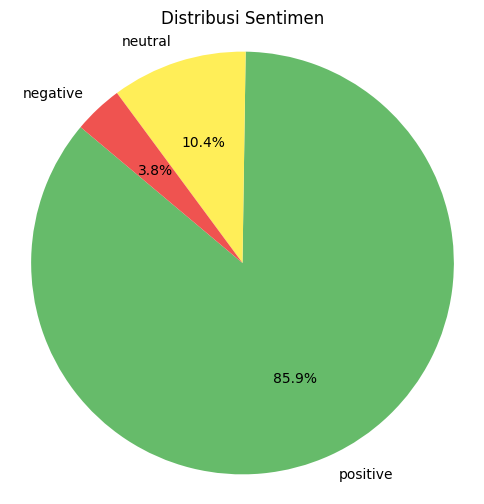

In [17]:
# Hitung distribusi sentimen
sentiment_counts = df_cleaned['polarity'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66bb6a', '#ffee58', '#ef5350'],
)

plt.title("Distribusi Sentimen")
plt.axis('equal')
plt.show()

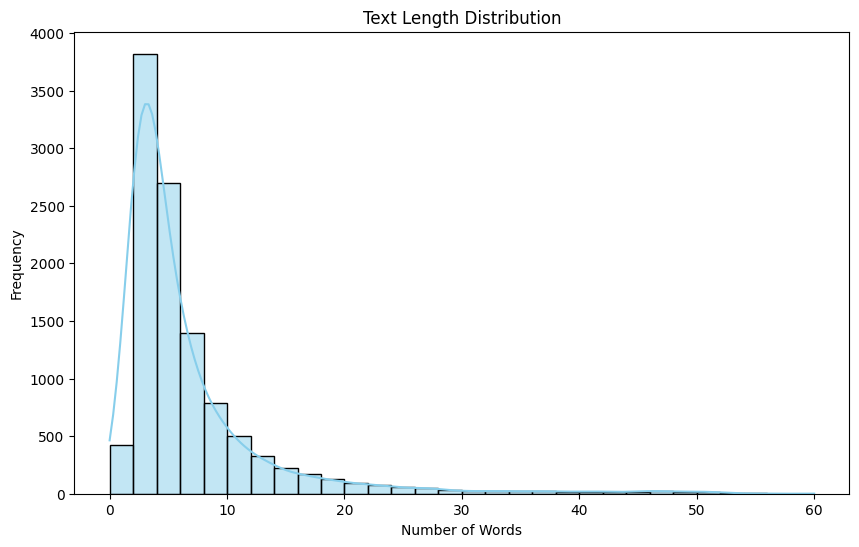

<ipython-input-18-460c91fa840f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='word', data=tfidf_top20, palette='viridis')


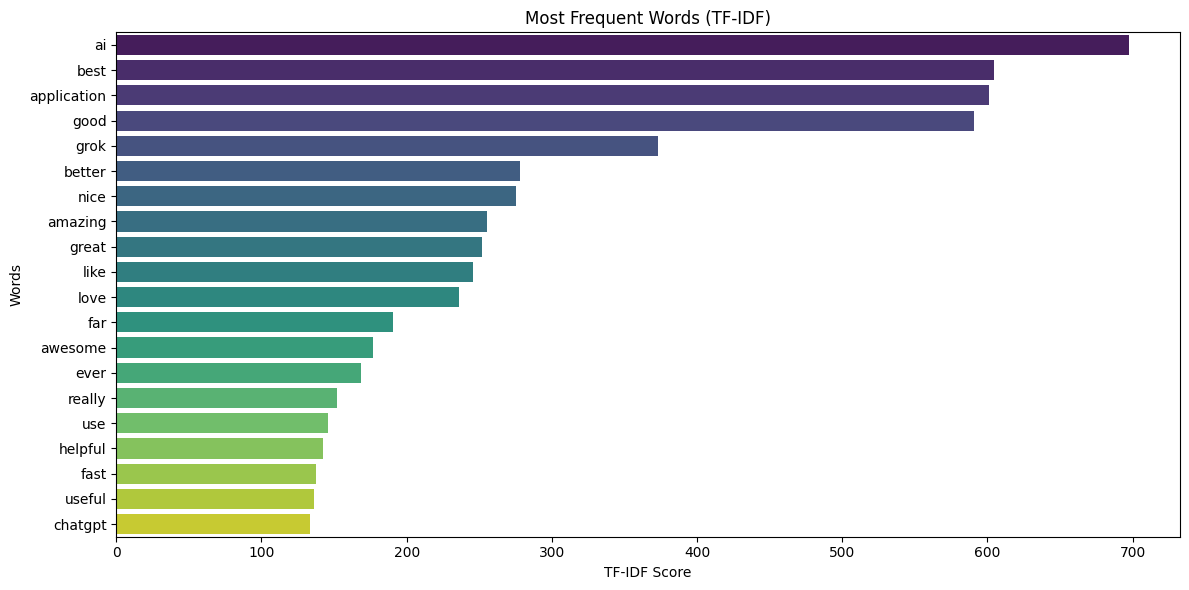

In [18]:
# Text Length Distribution
plt.figure(figsize=(10, 6))

# Hitung panjang teks berdasarkan jumlah kata
df_cleaned['text_length'] = df_cleaned['text_stopword'].apply(lambda x: len(x.split()))
sns.histplot(df_cleaned['text_length'], bins=30, kde=True, color='skyblue')

plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Most Frequent Words (TF-IDF)
plt.figure(figsize=(12, 6))

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cleaned['text_stopword'])  # gunakan kolom hasil preprocessing

# Buat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Jumlahkan bobot tiap kata, lalu ambil 20 kata tertinggi
tfidf_sum = tfidf_df.sum().reset_index(name='jumlah')
tfidf_sum.columns = ['word', 'jumlah']
tfidf_top20 = tfidf_sum.sort_values('jumlah', ascending=False).head(20)

# Visualisasi barplot
sns.barplot(x='jumlah', y='word', data=tfidf_top20, palette='viridis')
plt.title('Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

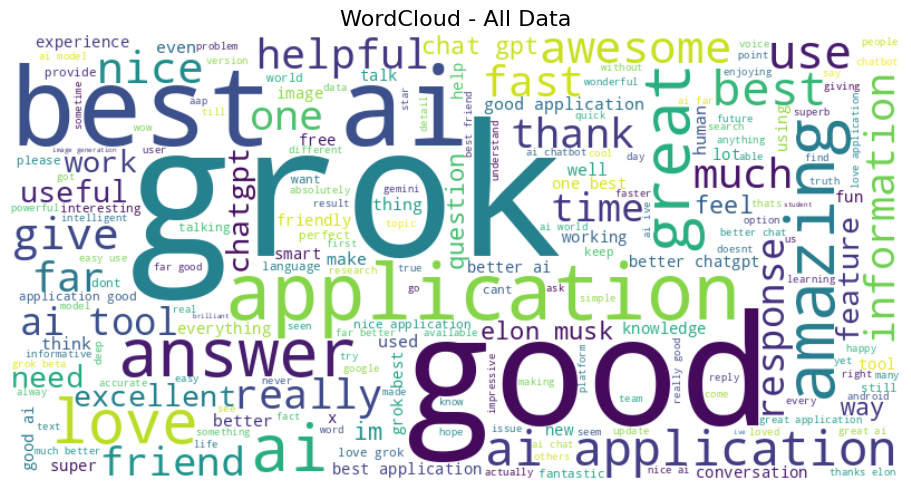

In [19]:
# Function untuk generate wordcloud dari teks
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=200, colormap='viridis').generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# WordCloud untuk seluruh data
generate_wordcloud(df_cleaned['text_stopword'], "WordCloud - All Data")


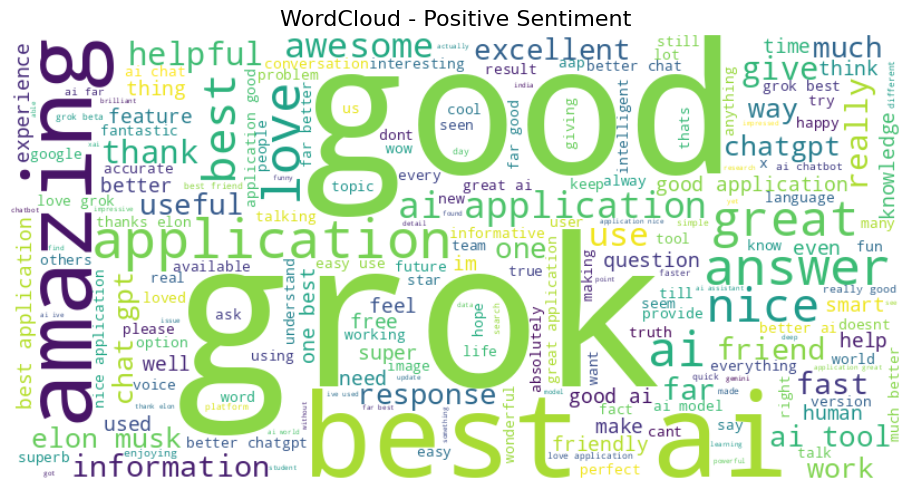

In [20]:
# WordCloud untuk data dengan polaritas positive
generate_wordcloud(df_cleaned[df_cleaned['polarity'] == 'positive']['text_stopword'], "WordCloud - Positive Sentiment")

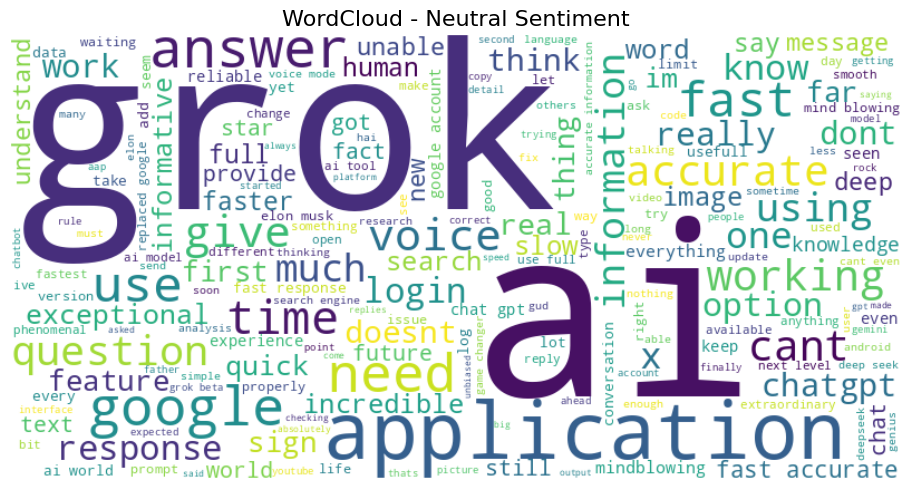

In [21]:
# WordCloud untuk data dengan polaritas neutral
generate_wordcloud(df_cleaned[df_cleaned['polarity'] == 'neutral']['text_stopword'], "WordCloud - Neutral Sentiment")

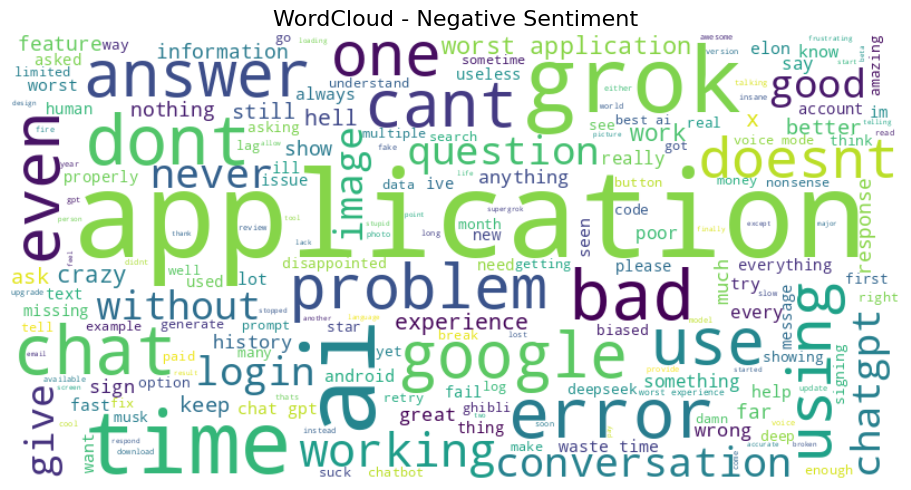

In [22]:
# WordCloud untuk data dengan polaritas negative
generate_wordcloud(df_cleaned[df_cleaned['polarity'] == 'negative']['text_stopword'], "WordCloud - Negative Sentiment")

#### Data Splitting

In [23]:
df_cleaned.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,text_stemmingText,polarity_score,polarity,text_length
0,71f488fe-4cab-43d0-8a91-27adfaf4df99,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's slow as molasses and I keep getting""an er...",2,0,0.3.2,2025-03-29 20:33:21,NaN,NaN,...,Its slow as molasses and I keep gettingan erro...,its slow as molasses and i keep gettingan erro...,its slow as molasses and i keep gettingan erro...,"[its, slow, as, molasses, and, i, keep, gettin...",slow molasses keep gettingan error occurred re...,slow molasses keep gettingan error occurred re...,slow molass keep gettingan error occur retri b...,-0.1027,negative,33
1,a447a3f4-354f-48fd-bb7a-45aaaa578301,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I can't say enough great things about Grok 3. ...,5,217,0.3.1,2025-03-27 14:40:47,NaN,NaN,...,I cant say enough great things about Grok So ...,i cant say enough great things about grok so ...,i cant say enough great things about grok so f...,"[i, cant, say, enough, great, things, about, g...",cant say enough great things grok far ive disc...,cant say enough great things grok far ive disc...,cant say enough great thing grok far ive discu...,-0.3156,negative,43
2,a9361b1f-f92b-4292-acf4-fc0eb25d42a6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this is an awesome tool for the creative midse...,5,168,0.3.2,2025-03-28 10:54:17,NaN,NaN,...,this is an awesome tool for the creative midse...,this is an awesome tool for the creative midse...,this is an awesome tool for the creative midse...,"[this, is, an, awesome, tool, for, the, creati...",awesome tool creative midset ive totally lost ...,awesome tool creative midset ive totally lost ...,awesom tool creativ midset ive total lost four...,0.9842,positive,32
3,03291398-7136-426a-8e88-f31317b9c36b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Freaking awesome for helping with making every...,4,33,0.3.2,2025-03-27 22:35:50,NaN,NaN,...,Freaking awesome for helping with making every...,freaking awesome for helping with making every...,freaking awesome for helping with making every...,"[freaking, awesome, for, helping, with, making...",freaking awesome helping making everything eas...,freaking awesome helping making everything eas...,freak awesom help make everyth easier issu tak...,0.9413,positive,42
4,92119528-0828-4b60-bfe8-0e9a92ea5f43,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I purchased SuperGrok for $30 which is crazy e...,1,81,0.3.2,2025-03-28 22:23:47,NaN,NaN,...,I purchased SuperGrok for which is crazy expe...,i purchased supergrok for which is crazy expe...,i purchased supergrok for which is crazy expen...,"[i, purchased, supergrok, for, which, is, craz...",purchased supergrok crazy expensive greeted we...,purchased supergrok crazy expensive greeted we...,purchas supergrok crazi expens greet well let ...,-0.0772,negative,32


In [24]:
# A. BoW + Naive Bayes
# 1. Ekstraksi fitur dengan BoW
bow = CountVectorizer(max_features=200, min_df=17, max_df=0.8)
X_bow = bow.fit_transform(df_cleaned['text_akhir'])

# 2. Split data
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df_cleaned['polarity'], test_size=0.2, random_state=42)

# 3. Latih model
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

# 4. Evaluasi
y_pred_bow = model_bow.predict(X_test_bow)

accuracy_test_bnb = accuracy_score(y_test, y_pred_bow)
y_train_pred = model_bow.predict(X_train_bow)
accuracy_train_bnb = accuracy_score(y_train, y_train_pred)

print("Akurasi (BoW + Naive Bayes):", accuracy_test_bnb)
print(classification_report(y_test, y_pred_bow))

print("Akurasi Training Set:", accuracy_train_bnb)

Akurasi (BoW + Naive Bayes): 0.8622727272727273
              precision    recall  f1-score   support

    negative       0.21      0.08      0.12        84
     neutral       0.47      0.17      0.25       208
    positive       0.89      0.97      0.93      1908

    accuracy                           0.86      2200
   macro avg       0.52      0.41      0.43      2200
weighted avg       0.82      0.86      0.83      2200

Akurasi Training Set: 0.8657954545454546


In [25]:
# B. TF-IDF + RF
# 1. Ekstraksi fitur dengan TF-IDF
X = df_cleaned['text_akhir']
y = df_cleaned['polarity']

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 3. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Evaluasi
y_pred = rf_model.predict(X_test)

accuracy_test_trf = accuracy_score(y_test, y_pred)
y_train_pred = rf_model.predict(X_train)
accuracy_train_trf = accuracy_score(y_train, y_train_pred)

print("Akurasi TF-IDF + RF:", accuracy_test_trf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Akurasi Training Set:", accuracy_train_trf)

Akurasi TF-IDF + RF: 0.9209090909090909

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.33      0.47        84
     neutral       0.72      0.67      0.69       208
    positive       0.94      0.97      0.96      1908

    accuracy                           0.92      2200
   macro avg       0.81      0.66      0.71      2200
weighted avg       0.92      0.92      0.91      2200

Akurasi Training Set: 0.9980681818181818


In [26]:
# C. TF-IDF + CNN
# Ekstraksi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.8)
X_tfidf = tfidf.fit_transform(df_cleaned['text_akhir']).toarray()

# Label encoding ke bentuk numerik lalu one-hot encoding
le = LabelEncoder()
y_encoded = le.fit_transform(df_cleaned['polarity'])  # misal: negative = 0, neutral = 1, positive = 2
y_categorical = to_categorical(y_encoded, num_classes=3)

# Split train-test 80/20
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_categorical, test_size=0.2, random_state=42)

# Bentuk model CNN
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # input harus 3D untuk Conv1D
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 kelas output

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape input agar bisa dipakai Conv1D (harus 3D)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Training model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluasi
train_loss, train_acc_cnn = model.evaluate(X_train_cnn, y_train)
test_loss, test_acc_cnn = model.evaluate(X_test_cnn, y_test)

print(f"\nAkurasi Training Set (TF-IDF + CNN): {train_acc_cnn:.4f}")
print(f"Akurasi Testing Set (TF-IDF + CNN): {test_acc_cnn:.4f}")


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8213 - loss: 0.6291 - val_accuracy: 0.8673 - val_loss: 0.4755
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8581 - loss: 0.4962 - val_accuracy: 0.8673 - val_loss: 0.4701
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8503 - loss: 0.5057 - val_accuracy: 0.8673 - val_loss: 0.4680
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8577 - loss: 0.4902 - val_accuracy: 0.8673 - val_loss: 0.4717
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8568 - loss: 0.4920 - val_accuracy: 0.8673 - val_loss: 0.4738
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8530 - loss: 0.4992 - val_accuracy: 0.8673 - val_loss: 0.4647
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8498 - loss: 0.5048 - val_accuracy: 0.8673 - val_loss: 0.4650
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8469 - loss: 0.5148 - val_accuracy: 0.

In [27]:
# D. Embedding + LSTM
# 1. Ekstraksi dilakukan di embedding layer
texts = df_cleaned['text_akhir']
labels = df_cleaned['polarity']

# 2. Label encoding utk label polarisasi
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_cat = to_categorical(y_encoded)

# 3. Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_cat, test_size=0.2, random_state=42)

# 5. LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
model.save("/content/drive/MyDrive/stupen/submission_analisis_sentimen/model_lstm.h5")
with open("/content/drive/MyDrive/stupen/submission_analisis_sentimen/tokenizer_lstm.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# 7. Evaluasi
train_acc_lstm = model.evaluate(X_train, y_train)[1]
test_acc_lstm = model.evaluate(X_test, y_test)[1]

print("Training Accuracy:", train_acc_lstm)
print("Testing Accuracy:", test_acc_lstm)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8399 - loss: 0.5590 - val_accuracy: 0.9209 - val_loss: 0.2283
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9338 - loss: 0.1970 - val_accuracy: 0.9373 - val_loss: 0.1888
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9582 - loss: 0.1206 - val_accuracy: 0.9405 - val_loss: 0.1923
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9845 - loss: 0.0551 - val_accuracy: 0.9409 - val_loss: 0.2141
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9935 - loss: 0.0304 - val_accuracy: 0.9455 - val_loss: 0.2437
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9943 - loss: 0.0202 - val_accuracy: 0.9441 - val_loss: 0.2988
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9946 - loss: 0.0213 - val_accuracy: 0.9468 - val_loss: 0.2861
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9972 - loss: 0.0101 - val_accuracy: 0.945

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9983 - loss: 0.0053
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9356 - loss: 0.4630
Training Accuracy: 0.9984090924263
Testing Accuracy: 0.9395454525947571


In [28]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Kombinasi Model': ['BoW + Naive Bayes', 'TF-IDF + RF', 'TF-IDF + CNN', 'Embedding + LSTM'],
    'Accuracy Train': [accuracy_train_bnb, accuracy_train_trf, train_acc_cnn, train_acc_lstm],
    'Accuracy Test': [accuracy_test_bnb, accuracy_test_trf, test_acc_cnn, test_acc_lstm]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Kombinasi Model', 'Accuracy Test']]
print(accuracy_test_only)

     Kombinasi Model  Accuracy Test
0  BoW + Naive Bayes       0.862273
1        TF-IDF + RF       0.920909
2       TF-IDF + CNN       0.867273
3   Embedding + LSTM       0.939545


<ipython-input-29-b73926ef3838>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy Test', y='Kombinasi Model', data=results_df, palette='coolwarm')


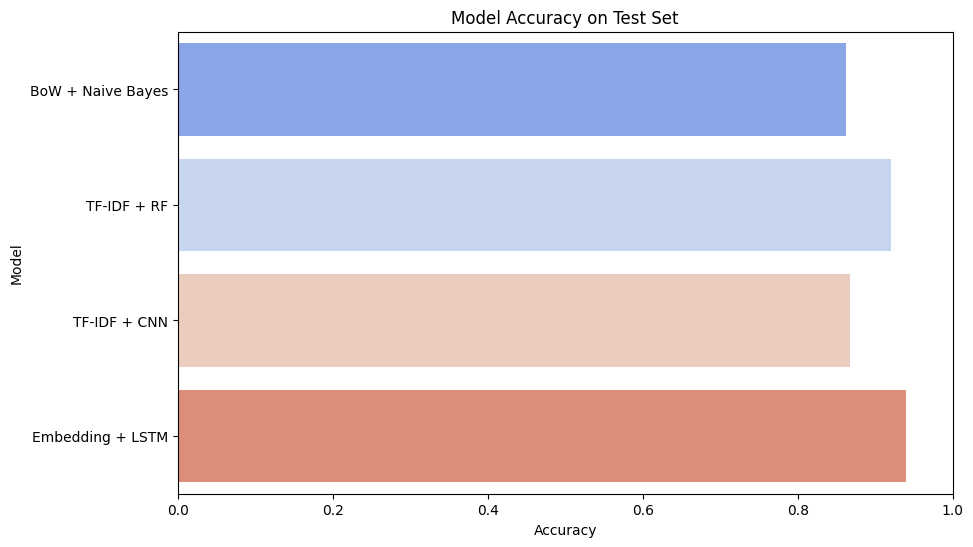

In [29]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy Test', y='Kombinasi Model', data=results_df, palette='coolwarm')
plt.title('Model Accuracy on Test Set')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

Setelah dilakukan pemodelan dengan 3 jenis kombinasi, model yang dipilih untuk analisis sentimen pada kalimat-kalimat baru adalah _deep learning_ LSTM (Long Short-Term Memory) dengan nilai _accuracy test_ tertinggi, yaitu 94%